In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import itertools
warnings.filterwarnings('ignore')

In [6]:
D=nx.read_edgelist("a1.csv",delimiter=',')

In [7]:
R = D.to_undirected()

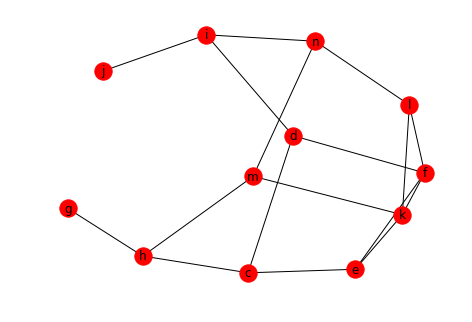

In [8]:
for node in R.nodes():
    if R.degree(node)==0:
        R.remove_node(node)
nx.draw(R,with_labels=True)
plt.show()

In [9]:
degree_dic={}
for node in R.nodes():
    degree_dic[node]=R.degree(node)
print(sorted(degree_dic.items(),key=lambda x:x[1],reverse=True))

[('k', 4), ('f', 4), ('h', 3), ('c', 3), ('m', 3), ('e', 3), ('d', 3), ('n', 3), ('l', 3), ('i', 3), ('g', 1), ('j', 1)]


In [10]:
nodepair=[]
for node in R.nodes():
    subpair=[]
    subpair.append(node)
    for i in R.nodes():
        if i not in subpair:
            subpair.append(i)
            for j in R.nodes():
                if j not in subpair:
                    subpair.append(j)
    nodepair.append(subpair)


nodepair=[i for i in itertools.combinations(R.nodes(), 3)]
print (nodepair)

[('g', 'h', 'c'), ('g', 'h', 'm'), ('g', 'h', 'e'), ('g', 'h', 'k'), ('g', 'h', 'd'), ('g', 'h', 'n'), ('g', 'h', 'f'), ('g', 'h', 'l'), ('g', 'h', 'i'), ('g', 'h', 'j'), ('g', 'c', 'm'), ('g', 'c', 'e'), ('g', 'c', 'k'), ('g', 'c', 'd'), ('g', 'c', 'n'), ('g', 'c', 'f'), ('g', 'c', 'l'), ('g', 'c', 'i'), ('g', 'c', 'j'), ('g', 'm', 'e'), ('g', 'm', 'k'), ('g', 'm', 'd'), ('g', 'm', 'n'), ('g', 'm', 'f'), ('g', 'm', 'l'), ('g', 'm', 'i'), ('g', 'm', 'j'), ('g', 'e', 'k'), ('g', 'e', 'd'), ('g', 'e', 'n'), ('g', 'e', 'f'), ('g', 'e', 'l'), ('g', 'e', 'i'), ('g', 'e', 'j'), ('g', 'k', 'd'), ('g', 'k', 'n'), ('g', 'k', 'f'), ('g', 'k', 'l'), ('g', 'k', 'i'), ('g', 'k', 'j'), ('g', 'd', 'n'), ('g', 'd', 'f'), ('g', 'd', 'l'), ('g', 'd', 'i'), ('g', 'd', 'j'), ('g', 'n', 'f'), ('g', 'n', 'l'), ('g', 'n', 'i'), ('g', 'n', 'j'), ('g', 'f', 'l'), ('g', 'f', 'i'), ('g', 'f', 'j'), ('g', 'l', 'i'), ('g', 'l', 'j'), ('g', 'i', 'j'), ('h', 'c', 'm'), ('h', 'c', 'e'), ('h', 'c', 'k'), ('h', 'c', 'd

In [12]:
threshold=1/2
affect_result={}
for node in R.nodes():
    num_of_affected_no_chg=False
    not_affected=R.nodes()
    affected=[]
    total=R.nodes()
    affected.append(node)
    NNN=0
    while num_of_affected_no_chg == False:
        num_of_affected_before=len(affected)
        for i in not_affected:
            num_of_all_neighbors=0
            num_of_affected_neighbors=0
            num_of_all_neighbors=len(R.neighbors(i))
            for j in R.neighbors(i):
                if j in affected:num_of_affected_neighbors+=1
            if num_of_affected_neighbors/num_of_all_neighbors>=threshold:
                if i in affected:pass
                else:affected.append(i)
                not_affected.remove(i)
        num_of_affected_after=len(affected)
        if num_of_affected_before==num_of_affected_after:NNN+=1
        if NNN>3:num_of_affected_no_chg=True
    affect_result[node]=len(affected)
print(sorted(affect_result.items(),key=lambda x:x[1],reverse=True))
print("total num of nodes {}".format(len(R.nodes())))

[('h', 2), ('i', 2), ('g', 1), ('c', 1), ('m', 1), ('e', 1), ('k', 1), ('d', 1), ('n', 1), ('f', 1), ('l', 1), ('j', 1)]
total num of nodes 12
